<a href="https://colab.research.google.com/github/prathyusha0310/Time_Series_Forecasting/blob/master/Time_series_forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving timeseries_train.csv to timeseries_train.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving timeseries_test.csv to timeseries_test.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving timeseries_sample_sub.csv to timeseries_sample_sub.csv


In [ ]:
train=pd.read_csv("timeseries_train.csv")
test=pd.read_csv("timeseries_test.csv")

In [ ]:
train_original=train.copy()
test_original=test.copy()

In [ ]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [ ]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [ ]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [ ]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [ ]:
train['Datetime']=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime']=pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format="%d-%m-%Y %H:%M")
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format="%d-%m-%Y %H:%M")

In [ ]:
for i in (train,test,train_original,test_original):
  i['year']=i.Datetime.dt.year
  i['month']=i.Datetime.dt.month
  i['hour']=i.Datetime.dt.hour
  i['day']=i.Datetime.dt.day

In [ ]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

def applyer(row):
  if row.dayofweek==5 or row.dayofweek==6:
    return 1
  else:
    return 0
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2
train.head()

,ID,Datetime,Count,year,month,hour,day,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,0,25,5,1
1,1,2012-08-25 01:00:00,2,2012,8,1,25,5,1
2,2,2012-08-25 02:00:00,6,2012,8,2,25,5,1
3,3,2012-08-25 03:00:00,2,2012,8,3,25,5,1
4,4,2012-08-25 04:00:00,2,2012,8,4,25,5,1


In [ ]:
train.index= train['Datetime']
train.head()

,ID,Datetime,Count,year,month,hour,day,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,0,25,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,1,25,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,2,25,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,3,25,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,4,25,5,1


In [ ]:
df=train.drop(labels="ID",axis=1)
df.head()

,Datetime,Count,year,month,hour,day,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,0,25,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,1,25,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,2,25,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,3,25,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,4,25,5,1


In [ ]:
ts=df['Count']

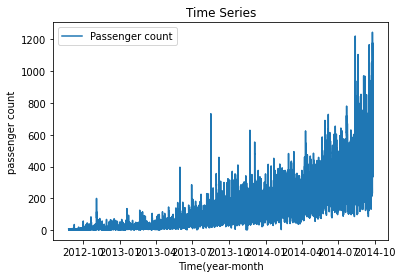

In [ ]:
plt.plot(ts,label='Passenger count')
plt.title("Time Series")
plt.xlabel("Time(year-month")
plt.ylabel("passenger count")
plt.legend(loc='best')

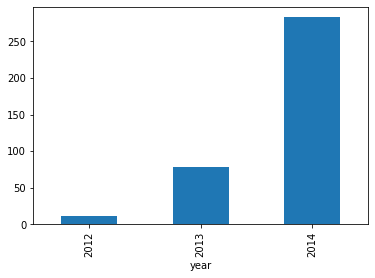

In [ ]:
train.groupby('year')['Count'].mean().plot.bar()

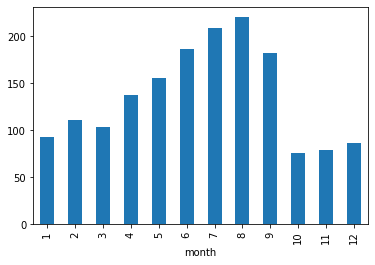

In [ ]:
train.groupby('month')['Count'].mean().plot.bar()

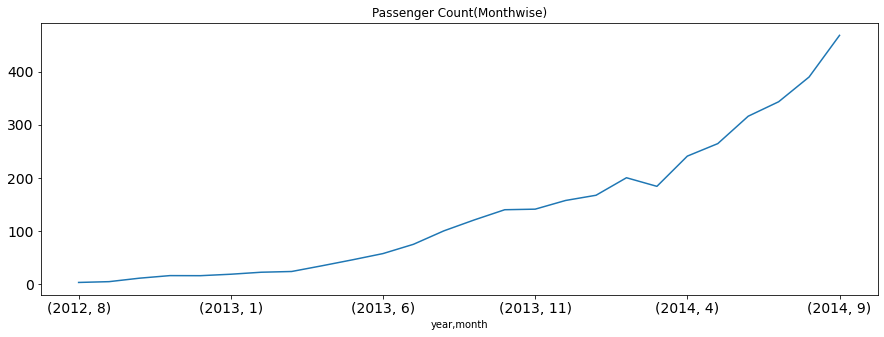

In [ ]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

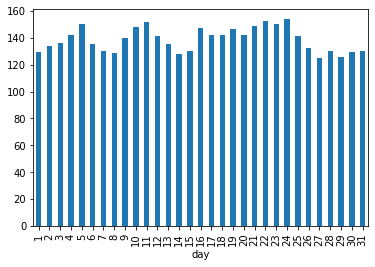

In [ ]:
train.groupby('day')['Count'].mean().plot.bar()

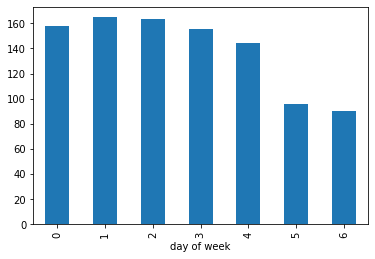

In [ ]:
train.groupby('day of week')['Count'].mean().plot.bar()

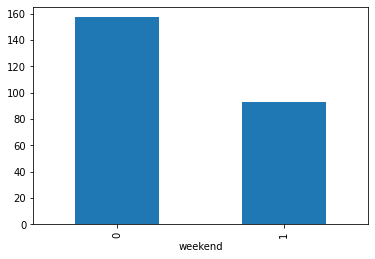

In [ ]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [ ]:
train.head()

,ID,Datetime,Count,year,month,hour,day,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,0,25,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,1,25,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,2,25,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,3,25,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,4,25,5,1


In [ ]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index=train.Timestamp
train.head()

,ID,Datetime,Count,year,month,hour,day,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,0,25,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,1,25,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,2,25,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,3,25,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,4,25,5,1


In [ ]:
hourly=train.resample('H').mean()
hourly.head()
daily=train.resample('D').mean()
daily.head()
weekly=train.resample('W').mean()
weekly.head()
monthly=train.resample('M').mean()
monthly.head()

,ID,Count,year,month,hour,day,day of week,weekend
Datetime,,,,,,,,
2012-08-31,83.5,2.952381,2012.0,8.0,11.5,28.0,3.000000,0.285714
2012-09-30,527.5,4.444444,2012.0,9.0,11.5,15.5,3.166667,0.333333
2012-10-31,1259.5,10.986559,2012.0,10.0,11.5,16.0,2.806452,0.258065
2012-11-30,1991.5,15.827778,2012.0,11.0,11.5,15.5,3.033333,0.266667
2012-12-31,2723.5,15.680108,2012.0,12.0,11.5,16.0,3.064516,0.322581


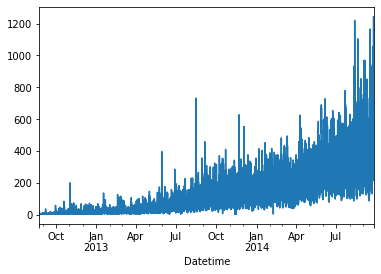

In [ ]:
hourly.Count.plot()

,ID,Datetime,year,month,hour,day
0,18288,2014-09-26 00:00:00,2014,9,0,26
1,18289,2014-09-26 01:00:00,2014,9,1,26
2,18290,2014-09-26 02:00:00,2014,9,2,26
3,18291,2014-09-26 03:00:00,2014,9,3,26
4,18292,2014-09-26 04:00:00,2014,9,4,26


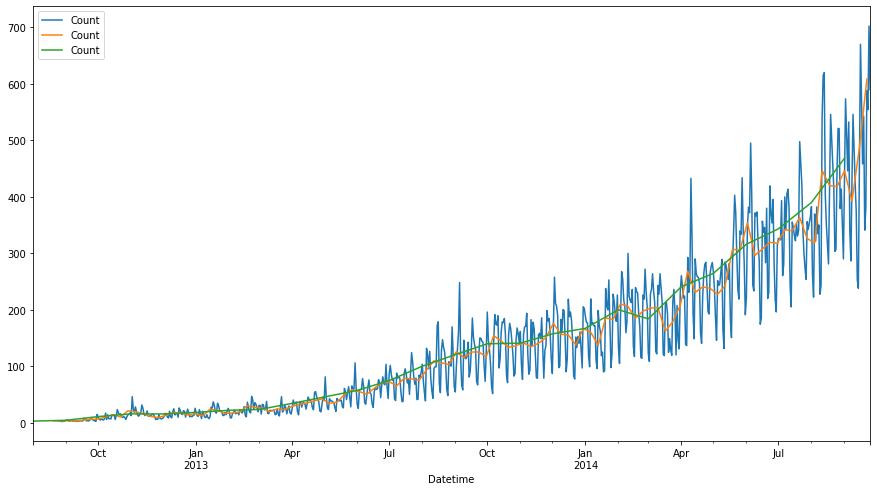

In [ ]:
daily.Count.plot()
weekly.Count.plot(),monthly.Count.plot(figsize=(15,8))
plt.legend()
test.head()

In [ ]:
# Converting to daily mean 
test = test.resample('D').mean() 

# Converting to daily mean 
train = train.resample('D').mean()

TypeError: ignored

In [ ]:
Train=train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

In [ ]:
valid.tail()

,ID,Datetime,Count,year,month,hour,day,day of week,weekend
Datetime,,,,,,,,,
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868,2014,9,19,25,3,0
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732,2014,9,20,25,3,0
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702,2014,9,21,25,3,0
2014-09-25 22:00:00,18286,2014-09-25 22:00:00,580,2014,9,22,25,3,0
2014-09-25 23:00:00,18287,2014-09-25 23:00:00,534,2014,9,23,25,3,0


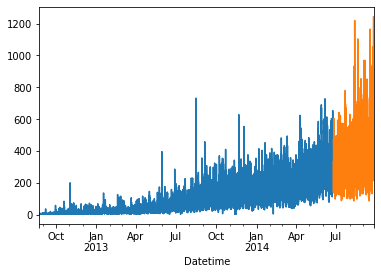

In [ ]:
Train.Count.plot()
valid.Count.plot()

In [ ]:
dd=np.asarray(Train.Count)
dd

array([  8,   2,   6, ..., 406, 352, 390])

In [ ]:
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]

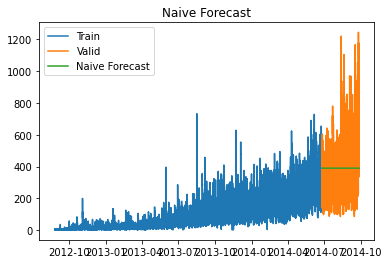

In [ ]:
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count,y_hat.naive))
rms

186.37368520699056

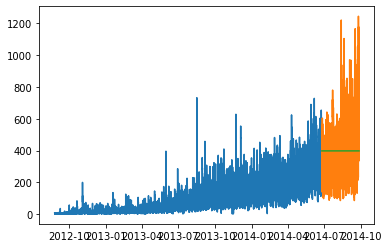

In [ ]:
#moving average
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(50).mean().iloc[-1]
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='moving_avg_forecast')
plt.show()

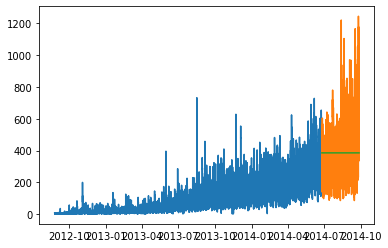

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SES'],label='SES')

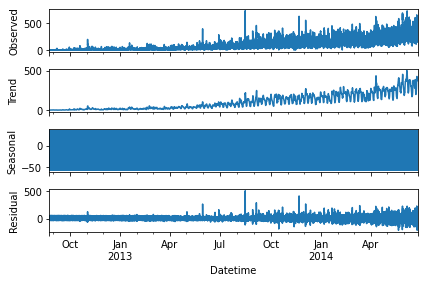

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()


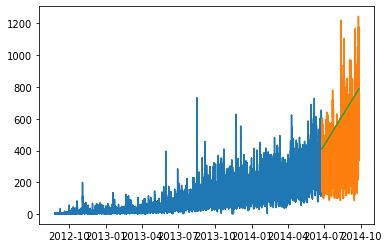

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.07)
y_hat_avg['Holt_linear']=fit1.forecast(len(valid))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_linear'],label='Holt_linear')
plt.show()

In [ ]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg['Holt_linear']))
print(rms)

279.82937386786693


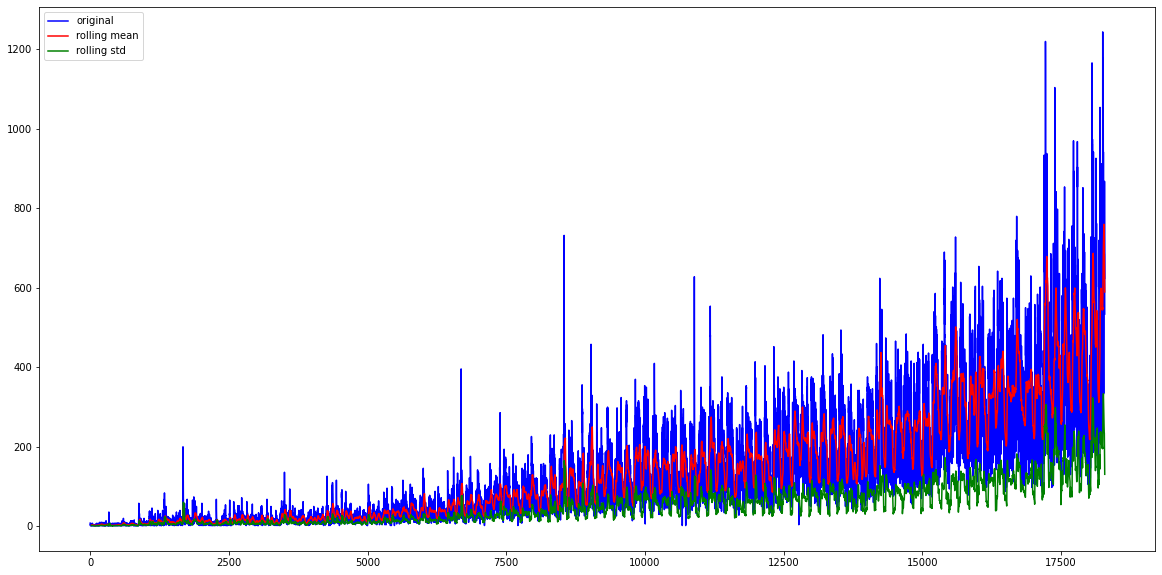

results of dickey-fuller test
Test-statistic                    -4.456561
#no.of lags used                   0.000235
p-value                           45.000000
number of observations used    18242.000000
Critical value(1%)                -3.430709
Critical value(5%)                -2.861698
Critical value(10%)               -2.566854
dtype: float64


In [ ]:
#stationary check
# we use dicky-fuller test to check the stationary
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
  rolmean=timeseries.rolling(window=24).mean()
  rolstd=timeseries.rolling(window=24).std()
  orig=plt.plot(timeseries,color="blue",label='original')
  mean=plt.plot(rolmean,color='red',label='rolling mean')
  std=plt.plot(rolstd,color='green',label='rolling std')
  plt.legend(loc='best')
  plt.show()
  print("results of dickey-fuller test")
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test-statistic','#no.of lags used','p-value','number of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value
  print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
test_stationary(train_original['Count'])


